# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?      
    **BTC had the highest mean positive score.**
2. Which coin had the highest negative score?      
    **ETH had the highest negative score.**
3. Which coin had the highest positive score?      
    **ETH had the highest positive score.**

In [115]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from newsapi.newsapi_client import NewsApiClient
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')
nltk.download('stopwords')
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/tamobee/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tamobee/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [116]:
# Read your api key environment variable
load_dotenv()
news = os.environ["NEWS_API_KEY"]

In [117]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=news)

In [118]:
# Fetch the Bitcoin news articles
bitcoin_headlines = newsapi.get_everything(
    q="bitcoin", 
    language="en",  
    sort_by="relevancy"
)

In [119]:
# Fetch the Ethereum news articles
ethereum_headlines = newsapi.get_everything(
    q="ethereum", 
    language="en", 
    sort_by="relevancy"
)

In [120]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_headlines["articles"]:
    try:
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["Compound", "Negative", "Neutral", "Positive", "text"]
bitcoin_df = bitcoin_df[cols]

bitcoin_df.head()

,Compound,Negative,Neutral,Positive,text
0,0.6369,0.000,0.838,0.162,Visa has partnered with cryptocurrency startup...
1,0.6486,0.000,0.826,0.174,After reaching a previous all-time high on Nov...
2,0.4019,0.000,0.928,0.072,Its been almost three years to the day since t...
3,0.2732,0.083,0.781,0.136,Everything is dumb until it works.\r\nAs 2020 ...
4,0.2023,0.000,0.950,0.050,"In November 2017, after an absolutely massive,..."


In [121]:
# Create the ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum_headlines["articles"]:
    try:
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
cols = ["Compound", "Negative", "Neutral", "Positive", "text"]
ethereum_df = ethereum_df[cols]

ethereum_df.head()

,Compound,Negative,Neutral,Positive,text
0,0.0000,0.0,1.000,0.000,FILE PHOTO: Representation of the Ethereum vir...
1,0.0000,0.0,1.000,0.000,FILE PHOTO: Representation of the Ethereum vir...
2,0.4215,0.0,0.912,0.088,LONDON (Reuters) - Digital currencies Ethereum...
3,0.0000,0.0,1.000,0.000,FILE PHOTO: Representations of virtual currenc...
4,0.0000,0.0,1.000,0.000,FILE PHOTO: A representation of virtual curren...


In [122]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe() 

,Compound,Negative,Neutral,Positive
count,19.000000,19.000000,19.000000,19.000000
mean,0.244032,0.017579,0.903789,0.078579
std,0.356654,0.035419,0.087501,0.078581
min,-0.585900,0.000000,0.773000,0.000000
25%,0.000000,0.000000,0.827500,0.000000
50%,0.202300,0.000000,0.897000,0.072000
75%,0.532650,0.000000,1.000000,0.157000
max,0.801600,0.103000,1.000000,0.209000


In [123]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.091955,0.014050,0.941400,0.044550
std,0.251162,0.046844,0.101239,0.077609
min,-0.340000,0.000000,0.672000,0.000000
25%,0.000000,0.000000,0.931500,0.000000
50%,0.000000,0.000000,1.000000,0.000000
75%,0.177900,0.000000,1.000000,0.064000
max,0.877900,0.196000,1.000000,0.318000


### Questions:

Q: Which coin had the highest mean positive score?

A: **BTC had the highest mean positive score.**

Q: Which coin had the highest compound score?

A: **ETH had the highest compound score.**

Q. Which coin had the highest positive score?

A: **ETH had the highest positive score.**

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [124]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import string
import re

lemmatizer = WordNetLemmatizer()

In [178]:
# Expand the default stopwords list if necessary
sw_addon = {'char', 'reuters', 'taken', 'photo', 'rather', 'seen', 'has',
            'unless', 'wa', 'even', 'youve', 'u', 'youll', 'ha', 'since', 
            'indeed', 'said', 'li', 'day', 'staff', 'illustration', 'picture',
            'yet', 'could','towards', 'since', 'also', 'reutersdado', 'ruvic', 
            'file', 'ruvicillustration', 'ruvicillustrationlondon', 'ruvicillustrationfile', 'stafffile'}

In [179]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
   
    # Create a list of the words
    # Convert the words to lowercase
    # Remove the punctuation
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    words = word_tokenize(re_clean)
    
    # Remove the stop words
    sw = set(stopwords.words('english'))
    
    # Lemmatize Words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
    tokens = [word for word in lem if word.lower() not in sw.union(sw_addon)]
                          
    return tokens

In [180]:
# Create a new tokens column for bitcoin
bitcoin_df["tokens"] = bitcoin_df['text'].apply(tokenizer)
bitcoin_df.head()

,Compound,Negative,Neutral,Positive,text,tokens
0,0.6369,0.000,0.838,0.162,Visa has partnered with cryptocurrency startup...,"[Visahas, partnered, cryptocurrency, startup, ..."
1,0.6486,0.000,0.826,0.174,After reaching a previous all-time high on Nov...,"[reaching, previous, alltime, high, November, ..."
2,0.4019,0.000,0.928,0.072,Its been almost three years to the day since t...,"[almost, three, year, price, Bitcoin, close, b..."
3,0.2732,0.083,0.781,0.136,Everything is dumb until it works.\r\nAs 2020 ...,"[Everything, dumb, worksAs, come, close, crypt..."
4,0.2023,0.000,0.950,0.050,"In November 2017, after an absolutely massive,...","[November, absolutely, massive, twomonth, rall..."


In [181]:
# Create a new tokens column for ethereum
ethereum_df["tokens"] = ethereum_df['text'].apply(tokenizer)
ethereum_df.head()

,Compound,Negative,Neutral,Positive,text,tokens
0,0.0000,0.0,1.000,0.000,FILE PHOTO: Representation of the Ethereum vir...,"[Representation, Ethereum, virtual, currency, ..."
1,0.0000,0.0,1.000,0.000,FILE PHOTO: Representation of the Ethereum vir...,"[Representation, Ethereum, virtual, currency, ..."
2,0.4215,0.0,0.912,0.088,LONDON (Reuters) - Digital currencies Ethereum...,"[LONDON, Digital, currency, Ethereum, XRP, soa..."
3,0.0000,0.0,1.000,0.000,FILE PHOTO: Representations of virtual currenc...,"[Representations, virtual, currency, Bitcoin, ..."
4,0.0000,0.0,1.000,0.000,FILE PHOTO: A representation of virtual curren...,"[representation, virtual, currency, Bitcoin, f..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [203]:
from collections import Counter
from nltk import ngrams
import inspect

In [207]:
# Define function to convert a series of type pandas.core.series.Series to list
# Another option is to use the Pandas' tolist() method
def seriesToList(s):
    
    # initialize an empty list 
    lst = []      
    # traverse in the lists   
    for ele in s:  
        lst += ele     
    # return list   
    return lst

btc = seriesToList(bitcoin_df['tokens'])
eth = seriesToList(ethereum_df['tokens'])

In [205]:
# Generate the Bitcoin N-grams where N=2
bigrams = ngrams(btc, n=2)
btc_dict = dict(Counter(bigrams).most_common(20))
btc_bigrams = btc_dict.items()
list(btc_bigrams)

[(('virtual', 'currency'), 3),
 (('alltime', 'high'), 2),
 (('copyrightGetty', 'ImagesBitcoin'), 2),
 (('new', 'alltime'), 2),
 (('currency', 'Bitcoin'), 2),
 (('Visahas', 'partnered'), 1),
 (('partnered', 'cryptocurrency'), 1),
 (('cryptocurrency', 'startup'), 1),
 (('startup', 'BlockFi'), 1),
 (('BlockFi', 'offer'), 1),
 (('offer', 'first'), 1),
 (('first', 'reward'), 1),
 (('reward', 'credit'), 1),
 (('credit', 'card'), 1),
 (('card', 'pay'), 1),
 (('pay', 'Bitcoin'), 1),
 (('Bitcoin', 'cash'), 1),
 (('cash', 'worth'), 1),
 (('worth', 'applying'), 1),
 (('applying', 'youre'), 1)]

In [186]:
# Generate the Ethereum N-grams where N=2
bigrams = ngrams(eth, n=2)
eth_dict = dict(Counter(bigrams).most_common(20))
eth_bigrams = eth_dict.items()
list(eth_bigrams)

[(('virtual', 'currency'), 12),
 (('currency', 'Bitcoin'), 9),
 (('representation', 'virtual'), 6),
 (('Representation', 'Ethereum'), 3),
 (('Ethereum', 'virtual'), 3),
 (('Representations', 'virtual'), 3),
 (('Major', 'US'), 3),
 (('Bitcoin', 'front'), 3),
 (('front', 'stock'), 3),
 (('stock', 'graph'), 3),
 (('graph', 'November'), 3),
 (('Bitcoin', 'November'), 3),
 (('currency', 'standing'), 2),
 (('standing', 'PC'), 2),
 (('PC', 'motherboard'), 2),
 (('motherboard', 'February'), 2),
 (('Bitcoin', 'March'), 2),
 (('March', 'Major'), 2),
 (('US', 'cryptocurrency'), 2),
 (('NEW', 'YORK'), 2)]

In [187]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [188]:
# Get the top 10 words for Bitcoin
token_count(btc)

[('Bitcoin', 8),
 ('cryptocurrency', 5),
 ('November', 5),
 ('year', 5),
 ('bitcoin', 4),
 ('value', 4),
 ('price', 4),
 ('currency', 4),
 ('reaching', 3),
 ('alltime', 3)]

In [189]:
# Get the top 10 words for Ethereum
token_count(eth)

[('Bitcoin', 14),
 ('currency', 13),
 ('virtual', 12),
 ('representation', 6),
 ('November', 6),
 ('US', 5),
 ('cryptocurrency', 5),
 ('Ethereum', 4),
 ('YORK', 4),
 ('Representation', 3)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [150]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

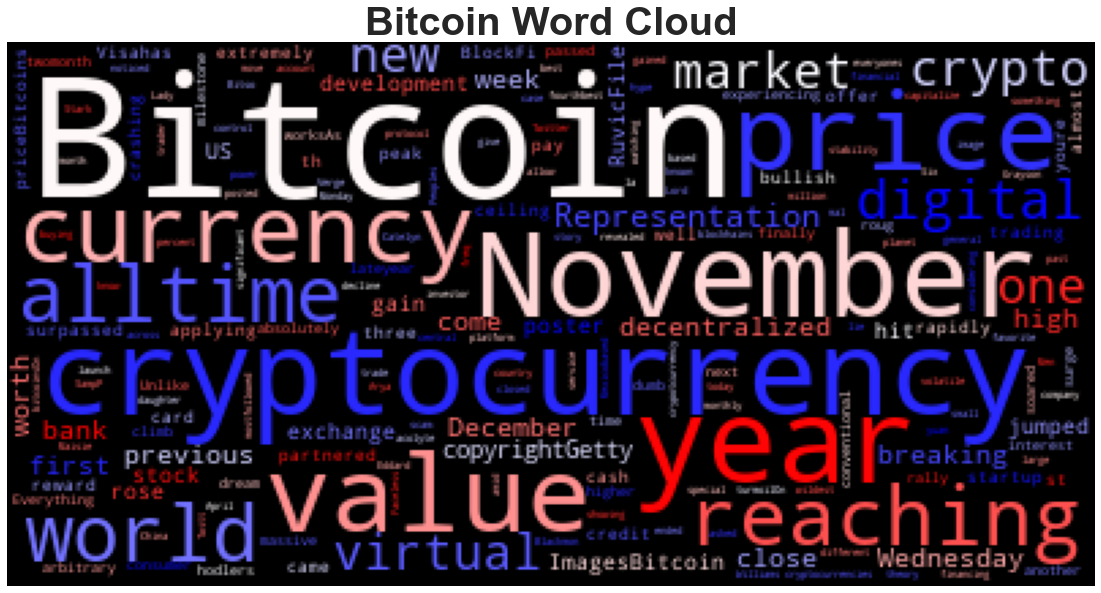

In [190]:
# Generate the Bitcoin word cloud
btc_string = ' '.join(btc)
wc = WordCloud(colormap="bwr").generate(btc_string)
plt.imshow(wc)
plt.axis("off")
plt.title("Bitcoin Word Cloud", fontsize=40, fontweight="bold")
plt.show()

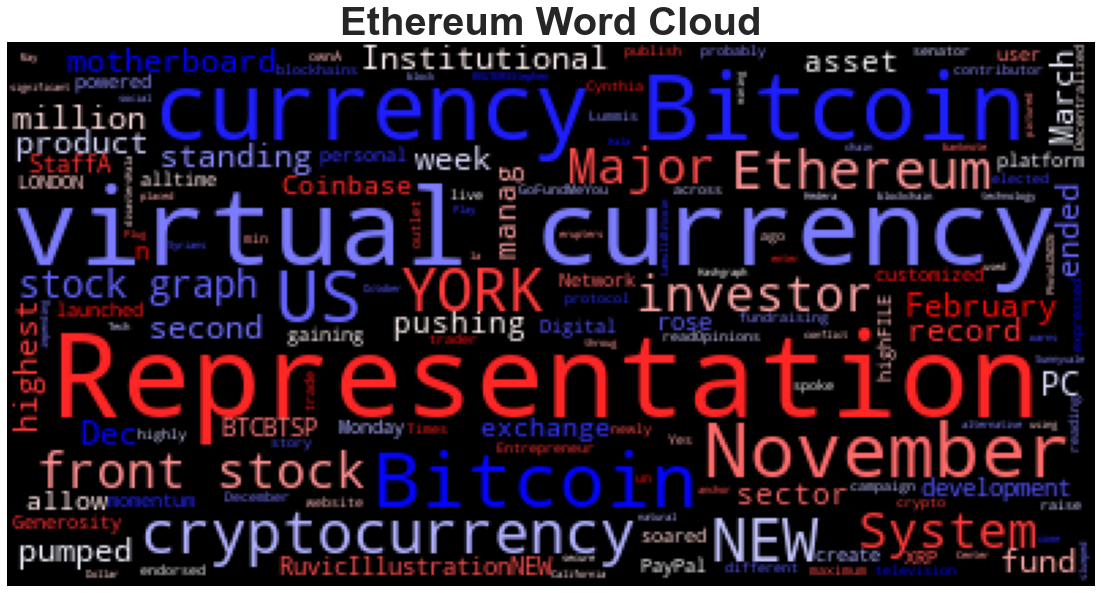

In [191]:
# Generate the Ethereum word cloud
eth_string = ' '.join(eth)
wc = WordCloud(colormap="bwr").generate(eth_string)
plt.imshow(wc)
plt.axis("off")
plt.title("Ethereum Word Cloud", fontsize=40, fontweight="bold")
plt.show()

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [192]:
import spacy
from spacy import displacy

In [193]:
# Optional - download a language model for SpaCy
#!python -m spacy download en_core_web_sm

In [194]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [195]:
# Concatenate all of the bitcoin text together
btc_ner = ""
for txt in bitcoin_df["text"]:
    btc_ner += txt 
btc_ner

"Visa\xa0has partnered with cryptocurrency startup BlockFi to offer the first rewards credit card that pays out in Bitcoin rather than cash, but is it worth applying for? Unless youre extremely bullish o… [+2239 chars]After reaching a previous all-time high on November 30th, 2020 and December 1st, 2020, bitcoin is now trading well above $20,000 and has surpassed its previous peak price.\r\nBitcoins value has rapidly… [+1062 chars]Its been almost three years to the day since the price of Bitcoin was close to breaking the $20,000 ceiling and came crashing down. On Wednesday, the arbitrary milestone of hodlers dreams was finally… [+1273 chars]Everything is dumb until it works.\r\nAs 2020 comes to a close, the cryptocurrency world is experiencing another late-year surge of consumer interest as prices climb in value. Bitcoin is over $23,000 a… [+1705 chars]In November 2017, after an absolutely massive, two-month rally, Bitcoin passed $10,000 for the first time. And then, over the next 20 da

In [196]:
# Run the NER processor on all of the text
doc = nlp(btc_ner)

# Add a title to the document
doc.user_data["title"] = "Bitcoin NER"

In [197]:
# Render the visualization
displacy.render(doc, style='ent')

In [198]:
# List all Entities
for ent in doc.ents:
    print(ent.text, ent.label_)

Visa ORG
first ORDINAL
Bitcoin GPE
November 30th, 2020 DATE
December 1st DATE
2020 DATE
bitcoin GPE
above $20,000 MONEY
almost three years DATE
the day DATE
Bitcoin GPE
20,000 MONEY
Wednesday DATE
2020 DATE
late-year DATE
Bitcoin GPE
over $23,000 MONEY
November 2017 DATE
two-month DATE
Bitcoin GPE
10,000 MONEY
first ORDINAL
the next 20 days DATE
19,665 MONEY
digital yuan ORG
the People’s Bank of China ORG
the past few weeks DATE
bitcoin GPE
digital ORG
hype GPE
Bitcoin GPE
20,000 MONEY
14,800 MONEY
more than 170% PERCENT
this year DATE
chars]Six years DATE
Mexico GPE
$62 million MONEY
chars]4 CARDINAL
U.S. GPE
November DATE
today DATE
500 CARDINAL
10.8 percent PERCENT
November DATE
monthly DATE
April DATE
fourth ORDINAL
Grayson Blackmon / PERSON
One CARDINAL
the year DATE
the day DATE
Twitter ORG
Williams PERSON
Arya Stark PERSON
Lady Catelyn PERSON
Eddard PERSON
acolyte PERSON
the Faceless Men WORK_OF_ART
Monday DATE
chars]8 CARDINAL
7 CARDINAL
Bitcoin GPE
above $18,000 MONEY
Tuesday 

---

## Ethereum NER

In [199]:
# Concatenate all of the bitcoin text together
eth_ner = ""
for txt in ethereum_df["text"]:
    eth_ner += txt
eth_ner

"FILE PHOTO: Representation of the Ethereum virtual currency standing on the PC motherboard is seen in this illustration picture, February 3, 2018. REUTERS/Dado Ruvic/Illustration\r\nLONDON (Reuters) - … [+1237 chars]FILE PHOTO: Representation of the Ethereum virtual currency standing on the PC motherboard is seen in this illustration picture, February 3, 2018. REUTERS/Dado Ruvic/Illustration\r\nLONDON (Reuters) - … [+1237 chars]LONDON (Reuters) - Digital currencies Ethereum and XRP soared on Monday, gaining momentum as bitcoin powered on towards its all-time high.\r\nFILE PHOTO: Representation of the Ethereum virtual currency… [+1950 chars]FILE PHOTO: Representations of virtual currency Bitcoin are seen in this picture illustration taken taken March 13, 2020. REUTERS/Dado Ruvic/Illustration\r\nLONDON (Reuters) - Major U.S. cryptocurrency… [+1031 chars]FILE PHOTO: A representation of virtual currency Bitcoin is seen in front of a stock graph in this illustration taken November 19, 2020

In [200]:
# Run the NER processor on all of the text
doc = nlp(eth_ner)

# Add a title to the document
doc.user_data["title"] = "Ethereum NER"

In [201]:
# Render the visualization
displacy.render(doc, style='ent')

In [202]:
# List all Entities
for ent in doc.ents:
    print(ent.text, ent.label_)

February 3, 2018 DATE
REUTERS/ ORG
Reuters ORG
February 3, 2018 DATE
REUTERS/ ORG
Reuters ORG
Reuters ORG
XRP ORG
Monday DATE
Bitcoin GPE
March 13, 2020 DATE
REUTERS/ ORG
Reuters ORG
U.S. GPE
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
Reuters ORG
U.S. GPE
Bitcoin GPE
March 13, 2020 DATE
REUTERS/ ORG
Reuters ORG
U.S. GPE
YORK PERSON
Reuters ORG
$429 million MONEY
the week ended Dec. 7 DATE
second ORDINAL
YORK PERSON
Reuters ORG
$429 million MONEY
the week ended Dec. 7 DATE
second ORDINAL
the Generosity Network ORG
20,000 MONEY
Reuters ORG
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
Reuters ORG
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
chars]The New York Times ORG
Coinbase ORG
15, 2020 DATE
6 min QUANTITY
A few days ago DATE
US GPE
Cynthia Lummis PERSON
Bitcoin GPE
Reuters ORG
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
Reuters ORG
Reuters ORG
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
Reuters ORG
Reuters ORG
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
LONDON 